This notebook will let us examine alpha diversity for a category in depth. We're already summarized the alpha diveristy p values for all categories in a [previous notebook](). Here, we can do post-hoc testing and look at the alpha diversity values associated with a single category.

Let's start by importing the modules and functions we'll need to the analysis.

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats
import skbio

import americangut.diversity_analysis as agdiv
import americangut.notebook_environment as agenv
from americangut.ag_data import AgData, ag_data_dictionary

/Users/jwdebelius/anaconda/envs/americangut/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from matplotlib import rcParams

% matplotlib inline

# Formats the axes using seabron so they will be white, and have ticks
# on the bottom of the axes.
sn.set_style('ticks', {'axes.facecolor': 'none'})

# Sets up plotting parameters so that the default setting is use to Helvetica
# in plots
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica', 'Arial']
rcParams['text.usetex'] = True

Next, let's select the data set and rarefaction depth we wish to use.

In [3]:
bodysite = 'fecal'
sequence_trim = '100nt'
rarefaction_depth = '10k'

use_subset = True
use_one_sample = True

Next, we'll load the data, and remove outliers.

In [4]:
fecal_data = AgData(bodysite=bodysite, 
                    trim=sequence_trim, 
                    depth=rarefaction_depth, 
                    sub_participants=use_subset, 
                    one_sample=use_one_sample)

fecal_data.drop_alpha_outliers()
fecal_data.drop_bmi_outliers()

Next, let's set up a directory where we will save our results.

In [9]:
save_dir = agenv.check_save_dir(fecal_data.data_set)
fig_dir = os.path.join(save_dir, 'alpha/images/')
tab_dir = os.path.join(save_dir, 'alpha/summary/')

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
if not os.path.exists(tab_dir):
    os.makedirs(tab_dir)

Finally, we can pick the alpha diversity metric, the category to interogate, and set and order, if one is relevant.

In [10]:
metric = 'PD_whole_tree'

group_name = 'AGE_CAT'

Now, let's read the files assoicated with the data and load the data dictionary entry for the group.

In [11]:
group = ag_data_dictionary[group_name]

We're going to start by cleaning up the data. So, let's remove any samples that might be outliers (in rounds 1-21, there is a sample with alpha diveristy seven standard deivations above the mean and 4 standard deviations about the next highest sample).

We'll also clean up the mapping column as needed, to make analsyis easier.

Now that we have the data loaded, let's plot it.

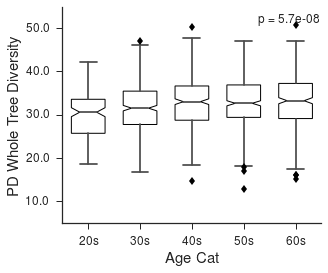

In [12]:
ax = agdiv.pretty_pandas_boxplot(meta=fecal_data.map_,
                                 group=group.name,
                                 metric='%s_%s' % (metric, rarefaction_depth),
                                 order=group.order,
                                 bw=True,
                                 ylim=[5, 55],
                                 xlabel=group.clean_name,
                                 xticklabels=group.order,
                                 ylabel='PD Whole Tree Diversity',
                                 show_p=True,
                                 )
ax.set_position((0.2, 0.2, 0.12*len(group.order), 0.75))
fig = ax.figure
fig.savefig(os.path.join(fig_dir, '%s_subset.pdf') % group.name)

We can also examine significant differences using a post-hoc test to see what drives these differences.

In [14]:
post_hoc = agdiv.post_hoc_pandas(meta=fecal_data.map_,
                                 group=group.name,
                                 cat='%s_%s'% (metric, rarefaction_depth),
                                 order=group.order,
                                 correct='bonferroni',
                                 )
post_hoc.to_csv(os.path.join(tab_dir, '%s_subset.txt') % group.name,
                sep='\t')
post_hoc

,Counts,Mean,Median,Stdv,20s,30s,40s,50s
AGE_CAT,,,,,,,,
20s,141,30.028666,30.564885,5.262526,NaN,NaN,NaN,NaN
30s,364,31.674329,31.498879,5.682827,3.725290e-02,NaN,NaN,NaN
40s,357,32.679108,32.998942,6.059913,6.305378e-05,0.176494,NaN,NaN
50s,395,33.001266,32.624068,5.486040,7.634356e-07,0.011707,1,NaN
60s,328,33.097028,33.221820,6.072345,2.576709e-06,0.013148,1,1
